In [1]:
# General hypothesis- We would like to use this data set to see if the pokemon with 
# the highest stats are the hardest to capture.

In [2]:
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

#Save from CSVs
pk_go_csv = pd.read_csv("Resources/pkmn-go.csv")
poke_spawns = pd.read_csv("Resources/pokemon-spawns.csv")

merged_csv = pd.merge(pk_go_csv, poke_spawns, on="name")
merged_csv.head(None)

cleaned_csv = merged_csv.drop_duplicates()

color_dict = {'Bug':'lightgreen', 'Dragon': 'darkpurple', 'Electric': 'yellow', 'Fairy': 'lightpink',
             'Fighting': 'darkred', 'Fire': 'orange', 'Ghost': 'purple', 'Grass': 'lightgreen', 'Ground': 'lightbrown',
             'Ice': 'lightblue', 'Normal': 'grey', 'Poison': 'light purple', 'Rock': 'brown', 'Water': 'lightblue'}
cleaned_csv.reset_index(drop=True).head(None)

,name,stamina,atk,def,capture_rate,flee_rate,spawn_chance,primary,secondary,cp,url,s2_id,s2_token,num,lat,lng,encounter_ms,disppear_ms
0,Bulbasaur,90,126,126,0.16,0.10,69.0,Grass,Poison,1079,http://cdn.bulbagarden.net/upload/thumb/2/21/0...,-9182898735737209000,808fca40de3,1,37.352721,-121.965752,1469520961740,1469520283284
1,Bulbasaur,90,126,126,0.16,0.10,69.0,Grass,Poison,1079,http://cdn.bulbagarden.net/upload/thumb/2/21/0...,-9182927600064922000,808fb000163,1,37.386986,-122.173674,-1,1469520478385
2,Bulbasaur,90,126,126,0.16,0.10,69.0,Grass,Poison,1079,http://cdn.bulbagarden.net/upload/thumb/2/21/0...,-9182910327853941000,808fbfb5ca1,1,37.562587,-122.033978,1469522340772,1469521691605
3,Bulbasaur,90,126,126,0.16,0.10,69.0,Grass,Poison,1079,http://cdn.bulbagarden.net/upload/thumb/2/21/0...,-9182956200252146000,808f95fd6c5,1,37.577153,-122.082546,1469522541812,1469521693152
4,Bulbasaur,90,126,126,0.16,0.10,69.0,Grass,Poison,1079,http://cdn.bulbagarden.net/upload/thumb/2/21/0...,-9182984574953587000,808f7c2eb87,1,37.717652,-122.453226,1469522434748,1469521960685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281143,Dragonair,122,170,152,0.08,0.06,2.0,Dragon,NaN,1760,http://cdn.bulbagarden.net/upload/thumb/9/93/1...,-9185790380451299000,8085845142b,148,37.860065,-122.485598,1469558403276,1469557938584
281144,Dragonair,122,170,152,0.08,0.06,2.0,Dragon,NaN,1760,http://cdn.bulbagarden.net/upload/thumb/9/93/1...,-9185790380451299000,8085845142b,148,37.860065,-122.485598,1469558403276,1469557938645
281145,Dragonair,122,170,152,0.08,0.06,2.0,Dragon,NaN,1760,http://cdn.bulbagarden.net/upload/thumb/9/93/1...,-9185794164317487000,808580e0793,148,37.806800,-122.423853,1469570699180,1469570176378
281146,Dragonair,122,170,152,0.08,0.06,2.0,Dragon,NaN,1760,http://cdn.bulbagarden.net/upload/thumb/9/93/1...,-9185794164317487000,808580e0793,148,37.806800,-122.423853,1469570699180,1469570176379


In [3]:
# pie chart of distribution of pokemon types
#take "primary" column, create lists to plot
types = cleaned_csv["primary"].value_counts(dropna=False).keys().tolist()
counts = cleaned_csv["primary"].value_counts(dropna=False).tolist()

plt.pie(counts, labels=labels, labeldistance=None)
plt.title("Pokemon by Type")
plt.axis('equal')
plt.savefig("Saved_Figures/pie_type")
plt.legend(labels, loc="upper right", bbox_to_anchor=(1.2,1.025))
plt.show()


NameError: name 'labels' is not defined

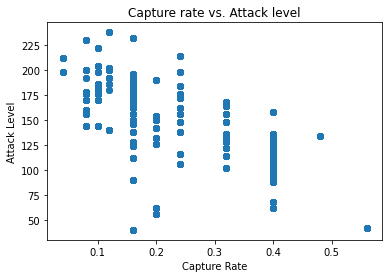

In [4]:
#Capture Rate v Attack Level 

plt.scatter(cleaned_csv['capture_rate'], cleaned_csv["atk"])
plt.title('Capture rate vs. Attack level')
plt.xlabel('Capture Rate')
plt.ylabel('Attack Level')
plt.savefig("Saved_Figures/capture_v_attack")
plt.show()

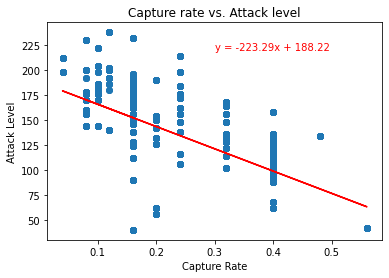

In [5]:
#Capture Rate v Attack Level with linregress line

#lin regress equation
x_data= cleaned_csv['capture_rate']
y_data= cleaned_csv["atk"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting graph
plt.scatter(cleaned_csv['capture_rate'], cleaned_csv["atk"])
plt.plot(x_data, regress_values, "r-")
plt.annotate(line_eq,(.3,220), color='red')
plt.title('Capture rate vs. Attack level')
plt.xlabel('Capture Rate')
plt.ylabel('Attack Level')
plt.savefig("Saved_Figures/cature_v_attack_linreg")
plt.show()


In [6]:
print(f'The rvalue is: {rvalue}')

The rvalue is: -0.6266260700729032


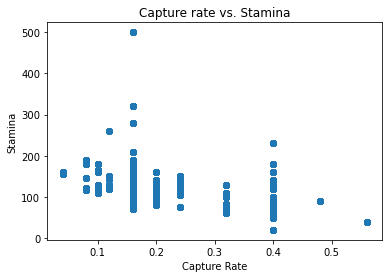

In [7]:
#Capture Rate v Stamina

plt.scatter(cleaned_csv['capture_rate'], cleaned_csv["stamina"])
plt.title('Capture rate vs. Stamina')
plt.xlabel('Capture Rate')
plt.ylabel('Stamina')
plt.savefig("Saved_Figures/capture_v_stamina")
plt.show()

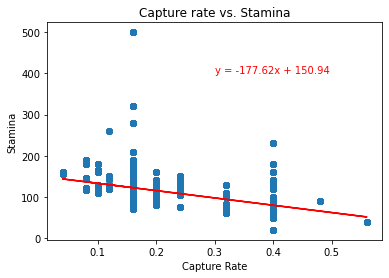

In [8]:
#Capture Rate v Stamina with linregress line

#lin regress equation
x_data2= cleaned_csv['capture_rate']
y_data2= cleaned_csv["stamina"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data2, y_data2)
regress_values = x_data2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting graph
plt.scatter(cleaned_csv['capture_rate'], cleaned_csv["stamina"])
plt.plot(x_data, regress_values, "r-")
plt.annotate(line_eq,(.3,400), color='red')
plt.title('Capture rate vs. Stamina')
plt.xlabel('Capture Rate')
plt.ylabel('Stamina')
plt.savefig("Saved_Figures/capture_v_stamina_linreg")
plt.show()


In [9]:
print(f'The rvalue is: {rvalue}')

The rvalue is: -0.4863638544217492


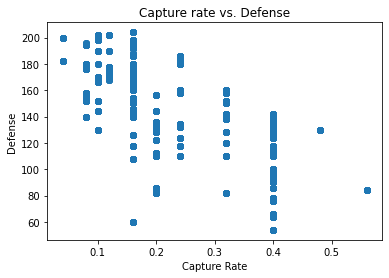

In [10]:
#Capture Rate v Defense

plt.scatter(cleaned_csv['capture_rate'], cleaned_csv["def"])
plt.title('Capture rate vs. Defense')
plt.xlabel('Capture Rate')
plt.ylabel('Defense')
plt.savefig("Saved_Figures/capture_v_defense")
plt.show()

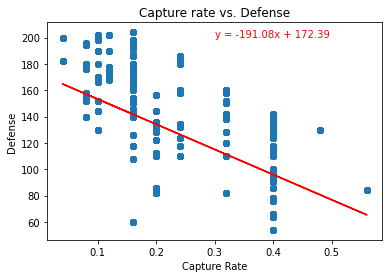

In [11]:
#Capture Rate v Defense with linregress line

#lin regress equation
x_data3= cleaned_csv['capture_rate']
y_data3= cleaned_csv["def"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data3, y_data3)
regress_values = x_data3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting graph
plt.scatter(cleaned_csv['capture_rate'], cleaned_csv["def"])
plt.plot(x_data, regress_values, "r-")
plt.annotate(line_eq,(.3,200), color='red')
plt.title('Capture rate vs. Defense')
plt.xlabel('Capture Rate')
plt.ylabel('Defense')
plt.savefig("Saved_Figures/capture_v_defense_linreg")
plt.show()


In [12]:
print(f'The rvalue is: {rvalue}')

The rvalue is: -0.5835128937875973
